In [1]:
# library
import sources.logins as lg
import xlwings as xw
import pathlib
import os
import sources.parts_list_0725 as pl
from IPython.display import Image
print('Add Library Done')

Add Library Done


In [2]:
folder_list = os.listdir()
for folder in folder_list:
    if folder.startswith('report'): print (folder)

report
reports_230808
reports_230809
reports_230815
reports_230817
reports_230821
reports_230822
reports_230823
reports_230824


In [17]:
# select file report to add image
folder_name = 'reports_230824'
try:
#     file = lg.file_select(end_with = '.xlsx',not_contains='xxx',folder_name = 'inspection')
    file = lg.file_select(end_with = '.xlsx',not_contains='xxx',folder_name = folder_name)
    
    wb = xw.Book(file)
    rp = wb.sheets[0]
    # rp.range('A' + str(rp.cells.last_cell.row)).end('up').row
    sn = rp.range('d18').value
    print(rp.range('K1').left - rp.range('H1').left)
    if sn is None:sn = rp.range('C11').value
    sn
except Exception as e:
    print(e)



______________________________________________________________________
|  No.|  File Name                               |  Modified Time    |
|____________________________________________________________________|
|  1  |  FFVN-GDKT-2023080057-EG250WR5,2G202K019.xlsx|  24-Aug-23 08:08  |
|  2  |  FFVN-GDKT-2023080058-EC250WL5,1C309K265.xlsx|  24-Aug-23 08:24  |
|  3  |  FFVN-GDKT-2023080084-EG530WR,4G361K015.xlsx|  24-Aug-23 15:18  |
|____________________________________________________________________|
Select file (Default 1): 3
"FFVN-GDKT-2023080084-EG530WR,4G361K015.xlsx" is selected
193.5


In [18]:
  # read all image in folder inspection
path = pathlib.Path().absolute()
paths = os.path.join(path,'inspection') #,'backup')
img_file=[]
for img in os.listdir(paths):
    if img.endswith('.jpg') or img.endswith('.JPG') or img.endswith('.png') or img.endswith('.PNG'):
        img_file.append(img)
img_file   

['1.jpg', '2.jpg']

In [19]:
# check max row number in auto report
max_img = 0
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

for i in range(30,50):
    if rp.range('A' + str(i)).value:
        check_img = rp.range('A' + str(i)).value
        if isfloat(check_img):
            max_img = max(max_img,check_img)
max_img

2.0

In [20]:
# add  margin
# add image to gdkt
# report_num
c= pl.technical_report()
# margin = 2.5

path = pathlib.Path().absolute()
paths = os.path.join(path,'inspection')
# img_width = int(200- margin * 2)
img_width = rp.range('K1').left - rp.range('H1').left #200
print('image_width: ',img_width)
# margin = (200 - img_width)/2
margin = 0
for i in range(30,50):
    if rp.range('A' + str(i)).value:
        
        for img in img_file:
            try:
                if img.startswith(str(int(rp.range('A'+ str(i)).value))):

    #                 print(rp.range('H' + str(i)).top,rp.range('H' + str(i)).left)

                    img_path = os.path.join(paths,img)
                    try:
                        rp.pictures.add(img_path,name=img,top = rp.range('H' + str(i)).top + margin,
                                        left=rp.range('H' + str(i)).left + margin)
                        next_top = c.resize_height_image(rp,img,img_width)
                        rp.range(str(i) +':'+ str(i)).api.RowHeight = next_top + margin * 2
                        print(f'{img} added.')
                    except:
                        print(f'{img} already added.')


                elif img.upper().startswith('SN'):
                    print(img)
                    img_path = os.path.join(paths,img)
                    try:
                        rp.pictures.add(img_path,name=img,top =rp.range('H16').top,left=rp.range('H16').left)
                        next_top = c.resize_height_image(rp,img,180)
                    except:
                        next
            except:
                next
    else:
        break
# delete fault pictures
for img in rp.pictures:
    if img.name.startswith('Picture') and img.name !='Picture 1':
        print(img.name)
        img.delete()

image_width:  193.5
1.jpg added.
2.jpg added.


1.jpg


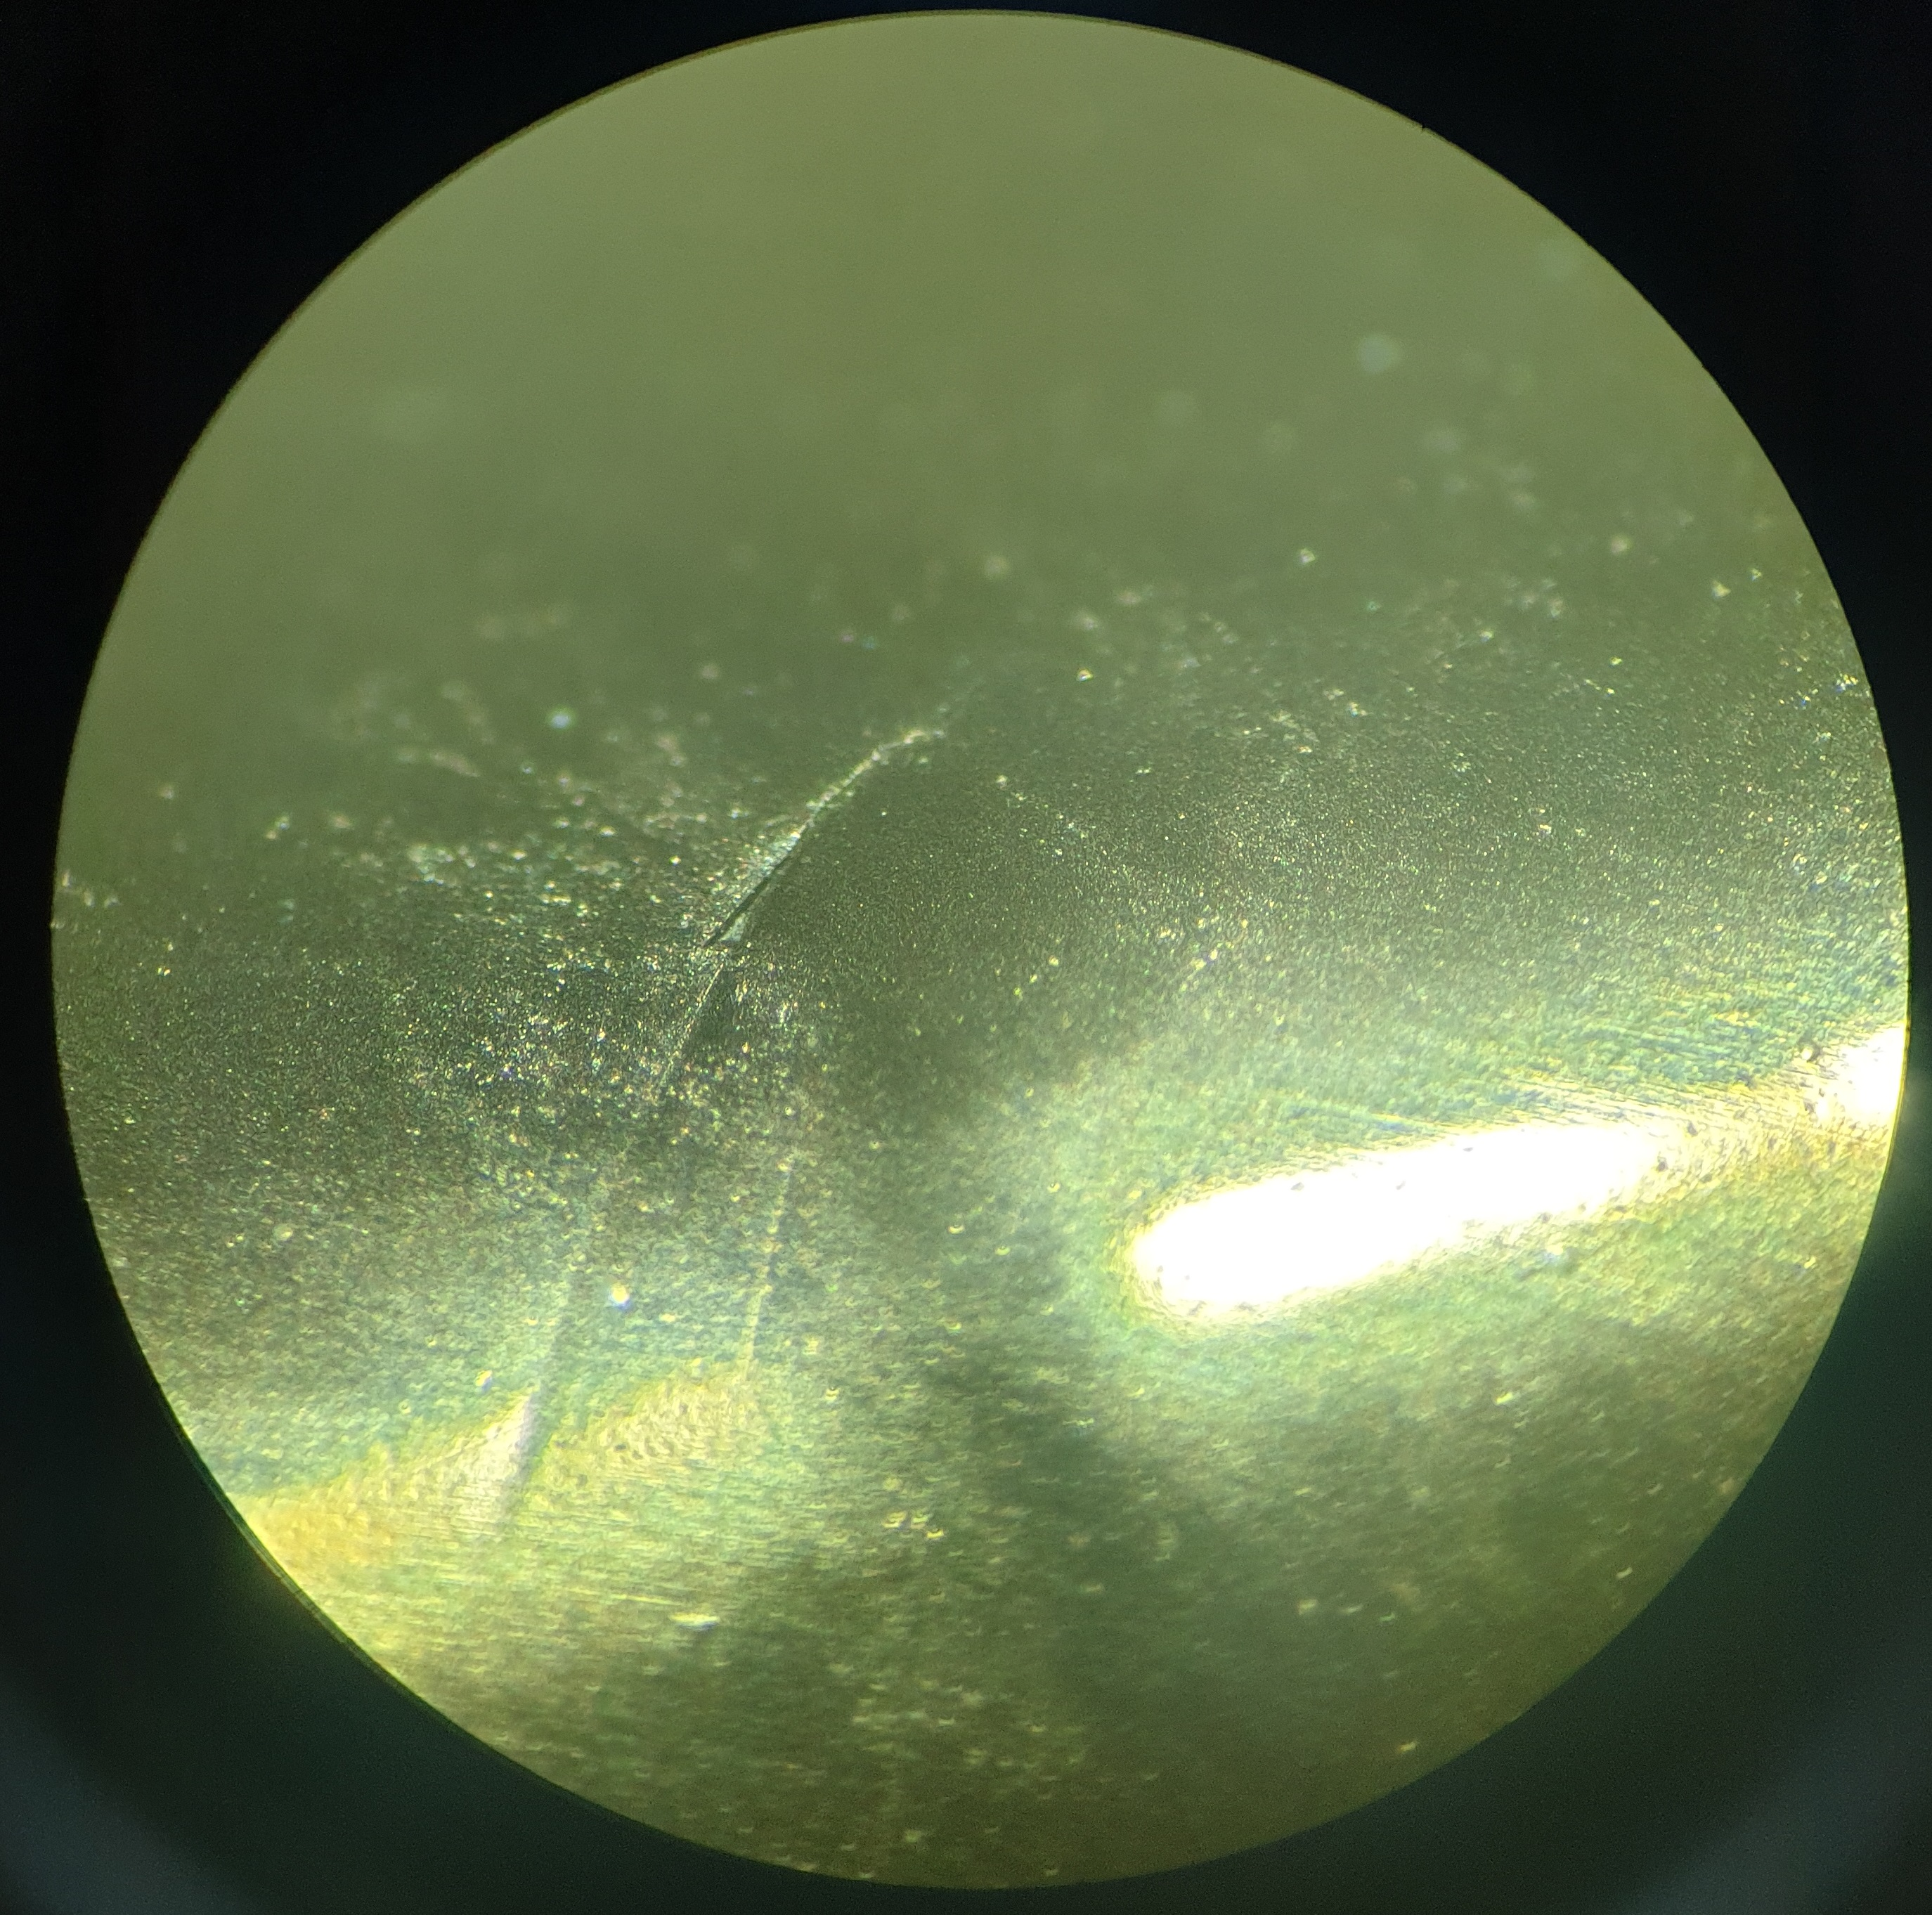

Comment: vca scratched
D:\Python\2023\inspection\1_VCA-SCRATCHED_4G361K015.jpg
2.jpg


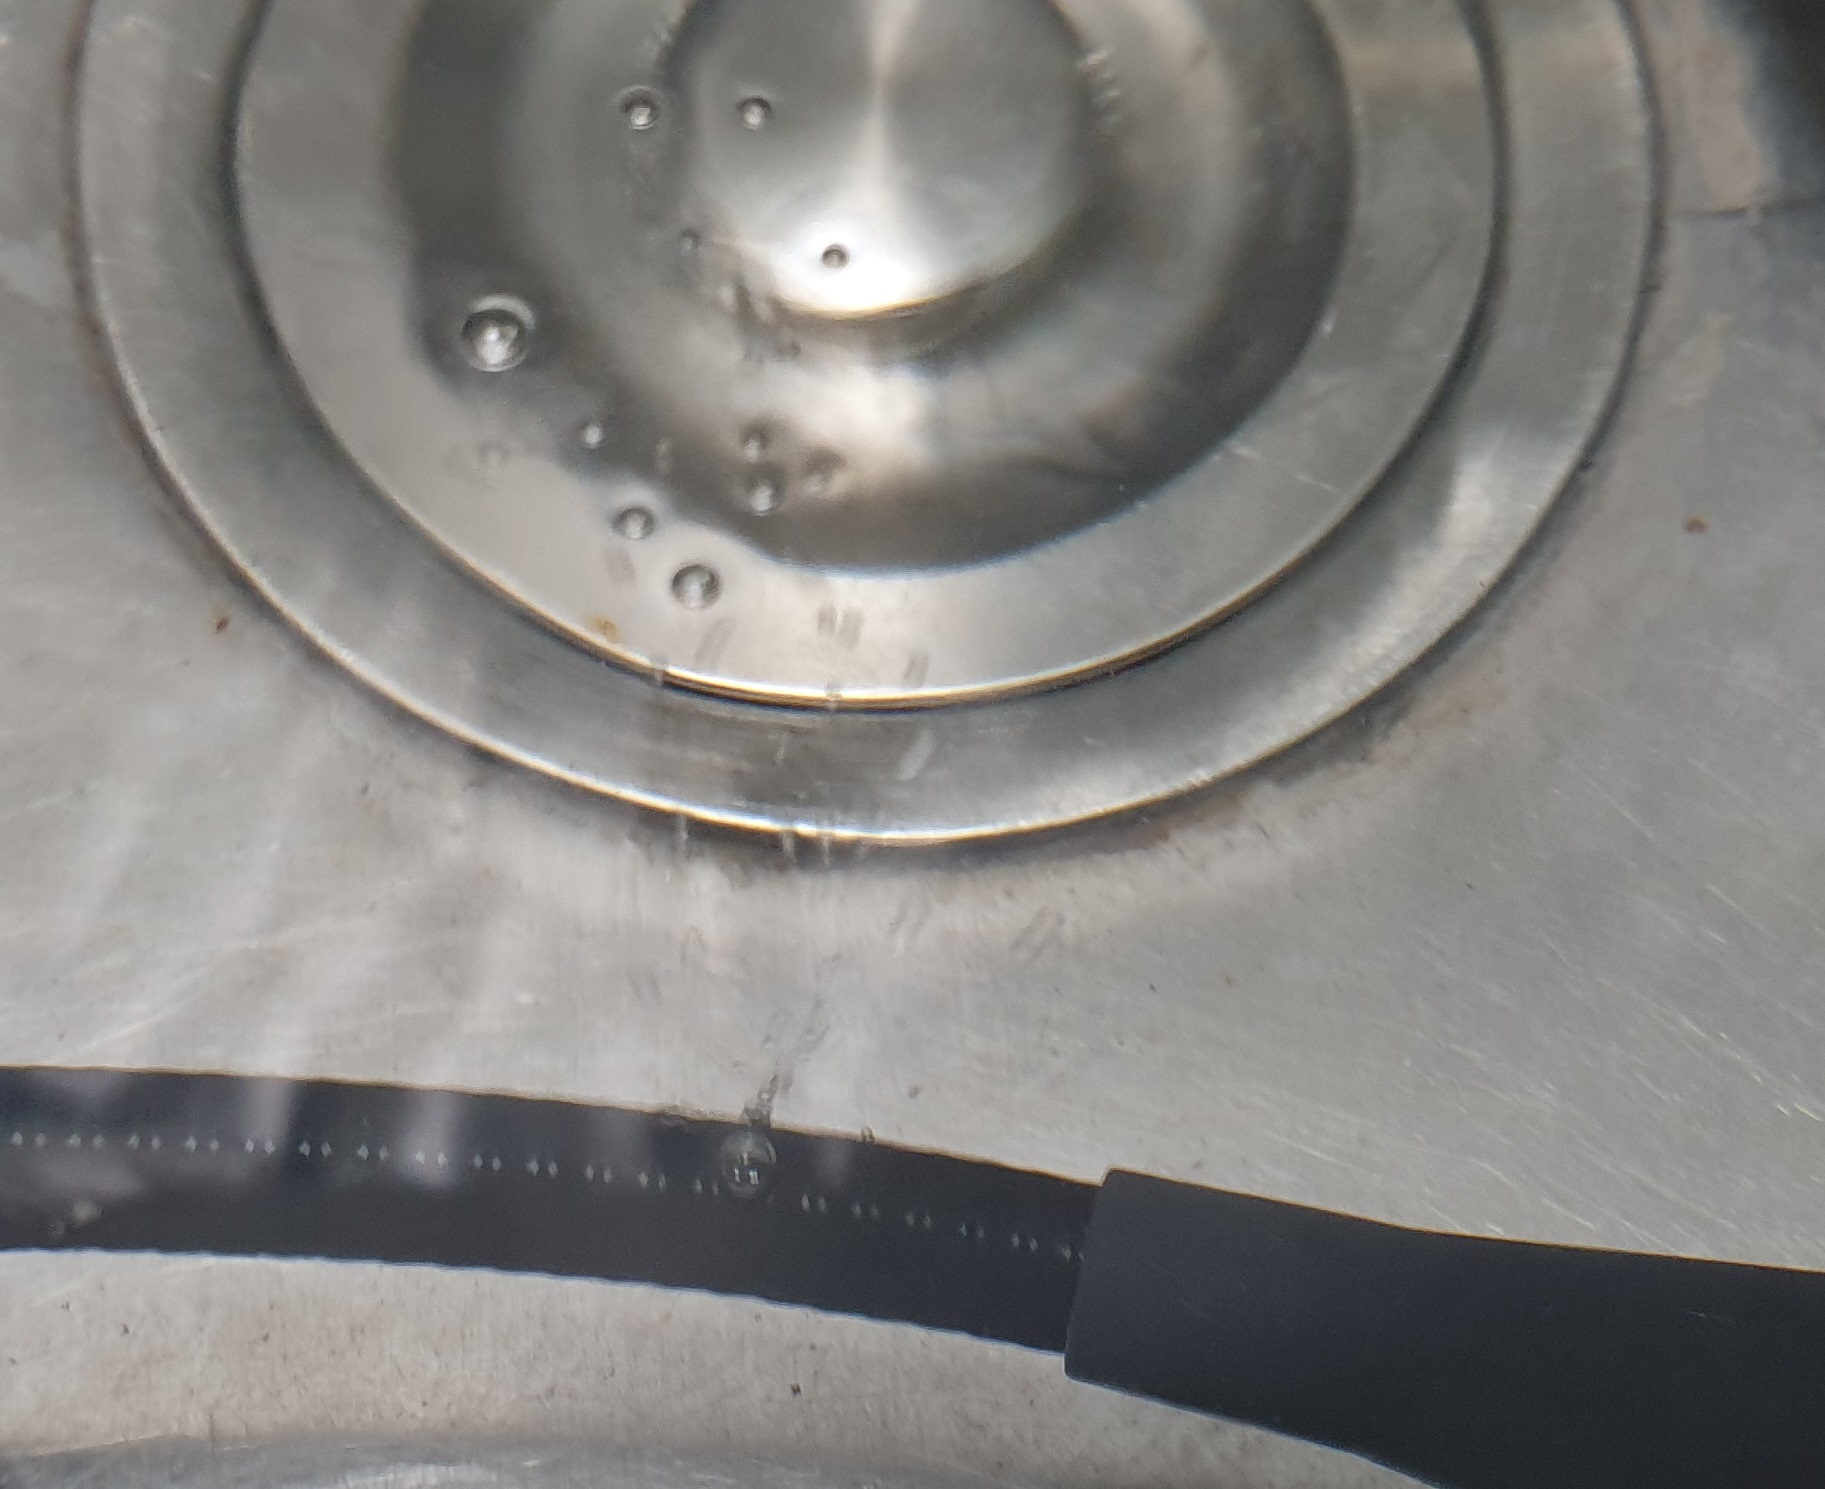

Comment: vca leaked
D:\Python\2023\inspection\2_VCA-LEAKED_4G361K015.jpg


In [21]:
##rename img
path = pathlib.Path().absolute()
path
folder_name = 'inspection'
new_img_file=[]
for img in img_file:
    print(img)
    
#     new_str = new_str.upper()
    old_name = os.path.join(path,folder_name,img)
    new_str = ''
    display(Image(old_name,width=200))
    new_str = input("Comment: " )
    new_str = new_str.upper()
    if new_str.startswith('rn') or new_str.startswith('RN'):
        new_str = new_str[3:]
        new_name = os.path.join(path,folder_name,f'{new_str.replace(" ","-")}.{old_name.split(".")[1]}')
        os.rename(old_name,new_name)
    elif new_str !='':
        new_name = os.path.join(path,folder_name,f'{old_name.split(".")[0]}_{new_str.replace(" ","-")}_{sn}.{old_name.split(".")[1]}')
        new_img_file.append(new_name)
        os.rename(old_name,new_name)
    
    print(new_name)

In [22]:
lg.backups('inspection','inspection\\backup','png')
lg.backups('inspection','inspection\\backup','jpg')

1_VCA-SCRATCHED_4G361K015.jpg    24-Aug-23 15:21 was backup to inspection\backup
2_VCA-LEAKED_4G361K015.jpg    24-Aug-23 15:20 was backup to inspection\backup


In [23]:
# delete image file
paths = 'inspection'
try:
    xw.Book(file).save()
    xw.Book(file).close()
    print(file.split('\\')[-1],' was closed')
except Exception as e:
    print(e)

try:
    xw.Book(file1).close()
    print(file1.split('\\')[-1],' was closed\n')
except Exception as e:
    print(e)
for img in new_img_file:
    try:
        os.remove(os.path.join(paths,img))
        print(f'Removed {img}')
    except:
        print('Cant not find.')

FFVN-GDKT-2023080084-EG530WR,4G361K015.xlsx  was closed
name 'file1' is not defined
Removed D:\Python\2023\inspection\1_VCA-SCRATCHED_4G361K015.jpg
Removed D:\Python\2023\inspection\2_VCA-LEAKED_4G361K015.jpg
